# Linear Regression

In [2]:
import pandas as pd
import numpy as np
import scipy.stats
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import model_selection
from sklearn.metrics import mean_squared_error
from math import sqrt

C:\Users\user\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
from sklearn.datasets import load_boston
boston=load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [5]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [6]:
boston.data.shape

(506, 13)

In [8]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [9]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [10]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [12]:
df=pd.DataFrame(boston.data)
df.shape


(506, 13)

In [13]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [14]:
df.columns=boston.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [15]:
df['HOUSING_VALUE']=boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,HOUSING_VALUE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [16]:
df.isnull().sum()

CRIM             0
ZN               0
INDUS            0
CHAS             0
NOX              0
RM               0
AGE              0
DIS              0
RAD              0
TAX              0
PTRATIO          0
B                0
LSTAT            0
HOUSING_VALUE    0
dtype: int64

In [17]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,HOUSING_VALUE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [18]:
df=df.drop(['AGE','TAX','B','ZN'],axis=1)

In [20]:
df.columns

Index(['CRIM', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'PTRATIO', 'LSTAT',
       'HOUSING_VALUE'],
      dtype='object')

In [45]:
df.head()

,CRIM,INDUS,CHAS,NOX,RM,DIS,RAD,PTRATIO,LSTAT,HOUSING_VALUE
0,0.00632,2.31,0.0,0.538,6.575,4.0900,1.0,15.3,4.98,24.0
1,0.02731,7.07,0.0,0.469,6.421,4.9671,2.0,17.8,9.14,21.6
2,0.02729,7.07,0.0,0.469,7.185,4.9671,2.0,17.8,4.03,34.7
3,0.03237,2.18,0.0,0.458,6.998,6.0622,3.0,18.7,2.94,33.4
4,0.06905,2.18,0.0,0.458,7.147,6.0622,3.0,18.7,5.33,36.2


In [52]:
x_train=df.drop(['HOUSING_VALUE'],axis=1)
y_train=df['HOUSING_VALUE']

In [53]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(x_train,y_train,test_size=0.3,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
                                                              

(354, 9)
(152, 9)
(354,)
(152,)


In [54]:
from sklearn.linear_model import LinearRegression
model=LinearRegression(n_jobs=-1)
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [55]:
print(model.coef_)

[ -0.13445095  -0.0307203    3.70087355 -17.82966206   3.98304232
  -1.15073734   0.10445838  -1.00307075  -0.57891208]


In [56]:
model.intercept_

37.165373102565304

In [57]:
print('R2 Value/Coefficient of Determination: {}'.format(model.score(x_test,y_test)))

R2 Value/Coefficient of Determination: 0.6974092953681144


In [58]:
model.predict(x_test)

array([29.08344384, 35.63726423, 16.9167308 , 25.49345367, 17.8156101 ,
       24.14781463, 17.42336146, 13.23073228, 22.61925127, 20.61017875,
       24.69443169, 19.26262973, -4.9692078 , 22.64557963, 19.47859742,
       25.41893429, 17.98569414,  4.32822626, 38.74614689, 16.42438676,
       26.25559771, 28.64296347, 11.32489751, 23.4239361 , 17.78447669,
       15.67712034, 23.68024247, 17.95675025, 22.83907199, 19.35539795,
       22.50230229, 25.19026023, 24.08683688, 17.66819544, 16.49178468,
       18.25271651, 31.50597322, 19.76282875, 24.35277539, 25.0270496 ,
       13.77613914, 30.20907522, 39.77713415, 18.35383029, 27.59041388,
       16.07051612, 14.24766469, 26.20124451, 19.57070225, 30.85768253,
       21.92732573, 33.79923377, 15.56083709, 26.45585921, 38.82010552,
       22.38836132, 17.75789945, 30.3513815 , 25.15037417, 13.33183533,
       22.238854  , 28.58910763, 31.34792605, 17.16359665, 22.53788057,
       16.98354085, 19.20384114, 25.77126245, 28.94913482, 15.34

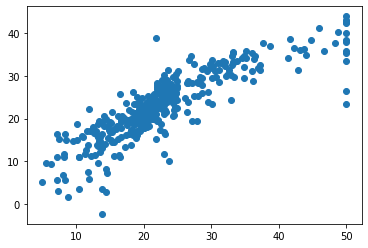

In [60]:
plt.scatter(y_train,model.predict(x_train))

In [59]:
print(sqrt(mean_squared_error(y_train,model.predict(x_train))))

4.882153506334504


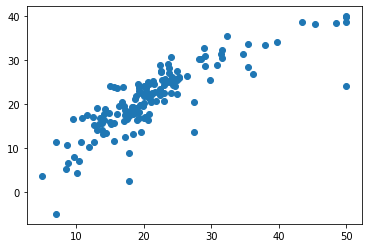

In [61]:
plt.scatter(y_test,model.predict(x_test))

In [62]:
print(sqrt(mean_squared_error(y_test,model.predict(x_test))))

4.748364991466423


In [63]:
pd.DataFrame({'Actual': y_test, 'Predicted': model.predict(x_test)}).head(10)

,Actual,Predicted
173,23.6,29.083444
274,32.4,35.637264
491,13.6,16.916731
72,22.8,25.493454
452,16.1,17.815610
76,20.0,24.147815
316,17.8,17.423361
140,14.0,13.230732
471,19.6,22.619251
500,16.8,20.610179


# Ridge Model

In [65]:
from sklearn.linear_model import Ridge
ridgereg=Ridge(alpha=0.001,normalize=True)
ridgereg.fit(x_train,y_train)

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)

In [67]:
print(sqrt(mean_squared_error(y_train,ridgereg.predict(x_train))))
print(sqrt(mean_squared_error(y_test,ridgereg.predict(x_test))))

4.882162905093482
4.748639657595653


In [68]:
print('R2 Value/Coefficient of Determination: {}'.format(ridgereg.score(x_test,y_test)))

R2 Value/Coefficient of Determination: 0.6973742880249573


# Lasso Model

In [69]:
from sklearn.linear_model import Lasso
lassoreg=Lasso(alpha=0.001,normalize=True)
lassoreg.fit(x_train,y_train)

print(sqrt(mean_squared_error(y_train,lassoreg.predict(x_train))))
print(sqrt(mean_squared_error(y_test,lassoreg.predict(x_test))))

print('R2 Value/Coefficient of Determination: {}'.format(lassoreg.score(x_test,y_test)))

4.883079011753308
4.757186829399188
R2 Value/Coefficient of Determination: 0.6962839034220931


# ElasticNet Model

In [70]:
from sklearn.linear_model import ElasticNet
elas=ElasticNet(alpha=0.001,normalize=True)
elas.fit(x_train,y_train)

print(sqrt(mean_squared_error(y_train,elas.predict(x_train))))
print(sqrt(mean_squared_error(y_test,elas.predict(x_test))))

print('R2 Value/Coefficient of Determination: {}'.format(elas.score(x_test,y_test)))

4.995822289052629
4.859352187856299
R2 Value/Coefficient of Determination: 0.6830986082960862
